# Impors

In [125]:
import numpy as np 
import pandas as pd 
import cv2
from PIL import Image
import xml.etree.ElementTree as ET # for parsing XML
import matplotlib.pyplot as plt 
import os
import glob
import random
from skimage.transform import resize


In [120]:
images_path="/kaggle/input/weed-detection/Ronin_OPEN_DB/raw images/"
annot_path= "/kaggle/input/weed-detection/Ronin_OPEN_DB/annotations/"

# Getting all the images and anntations

In [121]:
all_images  =  sorted(glob.glob(f'{images_path}/*.*'))
all_annot =  sorted(glob.glob(f'{annot_path}/*.*'))
print(f"Total images : {len(all_images)}")
print(f"Total annotation : {len(all_annot)}")

Total images : 1176
Total annotation : 1176


# Reading boundin_boxes Info (from XML file)

In [117]:
def bounding_box(xml_path):
    retval = []
    tree = ET.parse(xml_path)
    root = tree.getroot()
    objects = root.findall('object')
    size = root.findall('size')[0]
    w = int(size.find('width').text)
    h = int(size.find('height').text)
    d = int(size.find('depth').text)
    for o in objects:
        bndbox = o.find('bndbox') # reading bound box
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)

        retval.append(tuple((xmin, ymin, xmax, ymax,w,h,d)))   
    return retval

# Sample data

/kaggle/input/weed-detection/Ronin_OPEN_DB/raw images/32228.jpg
/kaggle/input/weed-detection/Ronin_OPEN_DB/annotations/32228.xml
Number of Weeds =  6


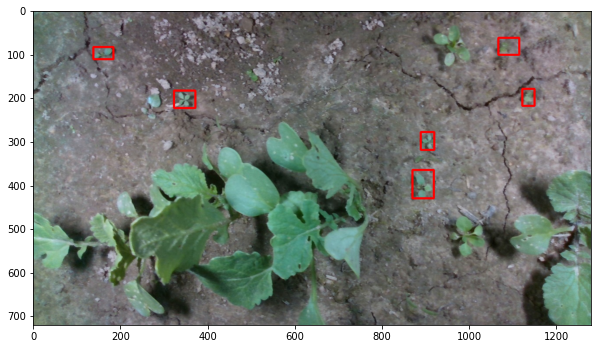

In [124]:
rand_number = random.randint(0,len(trn_fnames))

xml_path=all_annot [rand_number]
img_path=all_images [rand_number]

print(img_path)
print(xml_path)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

img=plt.imread(img_path)
bboxarray=bounding_box(xml_path) 
print("Number of Weeds = ", len(bboxarray))
for j,bbox in enumerate(bboxarray):   
    (x1,y1,x2,y2,w,h,d)=bbox
    out=cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0),3)
    ax.imshow(out)

In [126]:
# xml_path="/kaggle/input/weed-detection/Ronin_OPEN_DB/annotations//12114.xml"
# img_path="/kaggle/input/weed-detection/Ronin_OPEN_DB/raw images/12114.jpg"